In [1]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from datetime import datetime 
from sympy import *
from matplotlib.dates import DateFormatter
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from collections import Counter

In [2]:
# data visualization
data = pd.read_csv("temp_datalab_records_linkedin_company.csv", low_memory = False)
data.describe()
print('Data dimension:',data.shape)
print('Number if industries:',len(np.unique(data.industry.astype(str))))
print('Industies:',np.unique(data.industry.astype(str)))

Data dimension: (2426196, 14)
Number if industries: 141
Industies: ['Accounting' 'Airlines/Aviation' 'Apparel & Fashion'
 'Apparel &amp; Fashion' 'Automotive' 'Aviation & Aerospace'
 'Aviation &amp; Aerospace' 'Banking' 'Biotechnology' 'Broadcast Media'
 'Building Materials' 'Business Supplies and Equipment' 'Capital Markets'
 'Chemicals' 'Civil Engineering' 'Commercial Real Estate'
 'Computer & Network Security' 'Computer &amp; Network Security'
 'Computer Games' 'Computer Hardware' 'Computer Networking'
 'Computer Software' 'Construction' 'Consumer Electronics'
 'Consumer Goods' 'Consumer Services' 'Cosmetics' 'Dairy'
 'Defense & Space' 'Defense &amp; Space' 'Design' 'E-Learning'
 'Education Management' 'Electrical/Electronic Manufacturing'
 'Entertainment' 'Environmental Services' 'Events Services'
 'Executive Office' 'Facilities Services' 'Farming' 'Financial Services'
 'Fine Art' 'Food & Beverages' 'Food &amp; Beverages' 'Food Production'
 'Furniture' 'Gambling & Casinos' 'Gamblin

In [3]:
# feature extraction: monthly increasing rate:

# shrink the dates on a monthly basis
shrinked_updated_date=[]
for dataset in data.date_updated:
    dataset = dataset[0:7]
    shrinked_updated_date.append(dataset)
data['shrinked_updated_date'] = shrinked_updated_date
#print(data)

count=0
my_dict1={}
my_dict2={}
my_dict3={}
my_dict4={}
for company in data.company_name.unique():
    #print(company)
    count += 1
    print(count)

    temp1 = data[data.company_name == company]
    #print(temp1['industry'].get(temp1['industry'].keys()[0]))
    industry_name = temp1['industry'].get(temp1['industry'].keys()[0])
    
    comp_dates = []
    for date in temp1['date_updated']:
        date = date[0:7]
        comp_dates.append(date)

    #print(np.unique(np.array(comp_dates)))
    #print(comp_dates.shape)
    
    followerC = []
    employeeC = []
    shrink_dates = []
    
    for date in np.unique(np.array(comp_dates)):
        #print(date)
        #print(temp1.date_updated)
        shrink_dates.append(date)
        
        temp2 = temp1[temp1.shrinked_updated_date==date]
        followerC.append(str(int(np.mean(temp2['followers_count']))))
        employeeC.append(str(int(np.mean(temp2['employees_on_platform']))))
    
#     followerC_rate = np.zeros(len(followerC))
#     employeeC_rate = np.zeros(len(employeeC))
    follower_feature = np.zeros(len(followerC)-1)
    employee_feature = np.zeros(len(employeeC)-1)
    
    for i in range(len(followerC)-1):
        follower_feature[i] = np.divide(np.subtract(int(followerC[i+1]),int(followerC[i])),int(followerC[i]))
        employee_feature[i] = np.divide(np.subtract(int(employeeC[i+1]),int(employeeC[i])),int(employeeC[i]))
        
    # save all features of every company into dictionaries:
    my_dict1[company] = follower_feature
    my_dict2[company] = employee_feature
    my_dict3[company] = shrink_dates
    my_dict4[company] = industry_name
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883


2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2477
2478
2479
2480
2481
2482
2483
2484
2485
2486
2487
2488
2489
2490
2491
2492
2493
2494
2495
2496
2497
2498
2499
2500
2501
2502
2503
2504
2505
2506
2507
2508
2509
2510
2511
2512
2513
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545


3986
3987
3988
3989
3990
3991


/Users/rongrongliu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in true_divide


3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082
4083
4084
4085
4086
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4098
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4121
4122
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4138
4139
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4153
4154
4155
4156
4157
4158
4159
4160
4161
4162
4163
4164
4165
4166
4167
4168
4169
4170
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4185
4186
4187
4188
4189
4190
4191


In [4]:
# data test
print(my_dict3['Adobe'])
print(my_dict2['Adobe'])
print(my_dict1['Adobe'])
print(my_dict4['Adobe'])
#print(len(my_dict1.keys()))
#for key in my_dict1.keys():
   # print((my_dict1.get(key)))

['2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07']
[ 0.02756798  0.06380007 -0.01830996  0.01252815 -0.02050605 -0.02072245
  0.0369592   0.00992382  0.03632967 -0.00647703  0.09940184 -0.01320455
  0.0016107  -0.03142009 -0.0054917   0.01996918  0.0215927   0.00819571
  0.01332437  0.00844442  0.011783    0.04865216  0.00817408  0.01056811
 -0.00099596  0.00099695  0.01206219  0.00803674  0.00157284  0.01315861
 -0.00283271 -0.00514552 -0.00231669  0.0072362 ]
[0.02203798 0.0258466  0.01829027 0.01419097 0.01973507 0.01914604
 0.01802386 0.01656753 0.02121903 0.02697682 0.02221108 0.02330798
 0.01740918 0.01391725 0.01478636 0.01294112 0.0151033  0.0094110

In [5]:
# fill in empty features

full_dates=my_dict3['Adobe']
full_dates=full_dates[1:]
print(len(full_dates))

full_dict1={}
full_dict2={}

for key in my_dict3.keys():
    temp3 = my_dict3.get(key)
    #print(len(temp3))
    if len(temp3) > 1:
        temp3 = temp3[1:]
    else: continue
        
    temp2=my_dict2.get(key)
    temp1=my_dict1.get(key)
    
    T2=np.zeros(len(full_dates))
    T1=np.zeros(len(full_dates))
    #print(len(T1))
    
    #print(range(len(full_dates)-1))
    #print(temp3)

    for i in range(len(full_dates)):
        #print(i)
        if full_dates[i] in temp3:
            Ind=temp3.index(full_dates[i])
            #print(Ind)
            T2[i]=temp2[Ind]
            T1[i]=temp1[Ind]
            
    full_dict1[key]=T1
    full_dict2[key]=T2
    

34


In [7]:
# data test
print(len(full_dict1))
print(full_dict1['Alcon'])
#print(list(full_dict1.values()))
#print((full_dict1.values()))
X=np.concatenate((np.array(list(full_dict1.values())),np.array(list(full_dict2.values()))),axis=1)
X=np.nan_to_num(X)
print(X.shape)

4919
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0072629  0.01080258 0.01062956 0.01190563 0.01553216 0.01403979
 0.01438213 0.01443787 0.01519344 0.01390045]
(4919, 68)


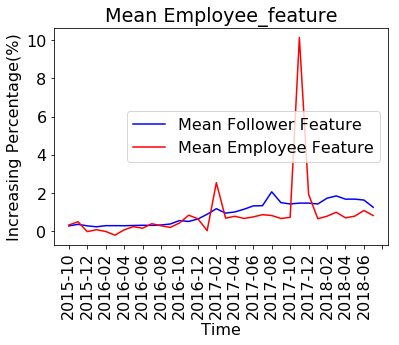

In [8]:
# plot mean results on a monthly basis:

full_dates=my_dict3['Adobe']
plt.rcParams.update({'font.size': 16})
plt.xticks(np.arange(len(full_dates), step=2),rotation='vertical')
plt.plot(full_dates[1:],np.multiply(np.mean(X[:,0:34],axis=0),100),'b',label='Mean Follower Feature')
#plt.xticks(np.arange(len(full_dates), step=2),rotation='vertical')
plt.plot(full_dates[1:],np.multiply(np.mean(X[:,34:],axis=0),100),'r',label='Mean Employee Feature')
plt.legend()
plt.xlabel('Time')
plt.title('Mean Employee_feature')
plt.ylabel('Increasing Percentage(%)')
plt.show()

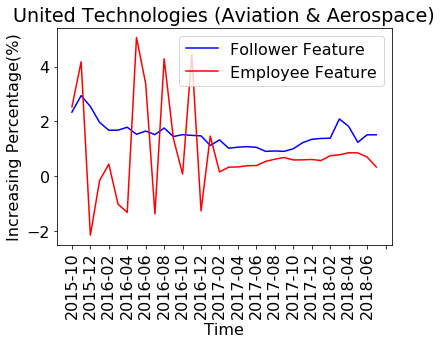

dict_keys(['Goldman Sachs', 'United Technologies', 'Novo Nordisk', "Lowe's Companies, Inc.", 'UnitedHealth Group', 'McKesson', 'BBVA', 'IBM', 'MasterCard', 'Sanofi', 'Novartis', 'Cisco', 'GE', 'RBC', 'Priceline.com', 'Philip Morris International', 'Intel Corporation', 'ConocoPhillips', 'TJ Maxx', 'Ford Motor Company', 'The Walt Disney Company', 'Procter & Gamble', 'BHP Billiton', "McDonald's Corporation", 'Amazon', 'Banco Santander', 'The Dow Chemical Company', 'Apple', 'TOTAL', 'HSBC', '3M', 'Simon Property Group', 'Google', 'Honeywell', 'Toyota Motor Corporation', 'Visa', 'Walmart', 'Texas Instruments', 'Duke Energy Corporation', 'Biogen', 'Chevron', 'Hewlett-Packard', 'Eli Lilly and Company', 'Oracle', 'Teva Pharmaceuticals', 'Morgan Stanley', 'Ambev', 'U.S. Bank', 'Starbucks', 'Anheuser-Busch InBev', 'BlackRock', 'Citi', 'Gilead Sciences', 'Celgene', 'Vodafone', 'Pfizer', 'The Home Depot', 'ExxonMobil', 'Prudential Financial', 'Costco Wholesale', 'Express Scripts', 'Scotiabank', 'T

In [19]:
# plot example results on a monthly basis:

full_dates = my_dict3['Adobe']
Ind0 = 2
plt.rcParams.update({'font.size': 16})
plt.xticks(np.arange(len(full_dates), step = 2),rotation = 'vertical')
plt.plot(full_dates[1:],np.multiply((X[Ind0,0:34]),100),'b',label='Follower Feature')
plt.xticks(np.arange(len(full_dates), step = 2),rotation = 'vertical')
plt.plot(full_dates[1:],np.multiply((X[Ind0,34:]),100),'r',label='Employee Feature')
plt.xlabel('Time')
plt.ylabel('Increasing Percentage(%)')
plt.title('United Technologies (Aviation & Aerospace)')
plt.legend()
plt.show()
print(my_dict1.keys())

In [243]:
# cluster companies based on their monthly increasing rates:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans[2000:2100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Goldman Sachs
Deutsche Bank
Evercore
Greenhill & Co.
Moelis &amp; Company
Cowen and Company
Moelis & Company
Starwood Property Trust
Senior Housing Properties Trust (SNF)


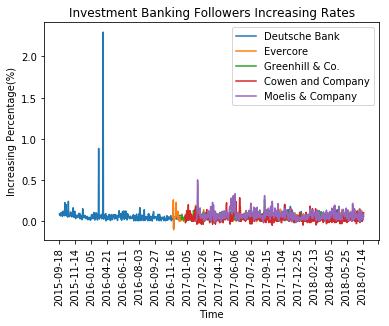

In [67]:
temp1=data[data.industry=='Investment Banking']
#print(temp1)

dates=[]
for date in temp1['date_updated']:
    date = date[0:10]
    dates.append(date)

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>500):  # only show six most frequently appeared companies as examples
        temp2=temp1[temp1.company_name==company]
        comp_dates=[]
        for date in temp2['date_updated']:
            date = date[0:10]
            comp_dates.append(date)
        start=min(comp_dates)
        stop=max(comp_dates)
#temp2
#temp1.company_name.unique()
        followerC=temp2['followers_count']
    
        # In order to compare increasing rates of different companies in parallel, 
        # the results were calculated as the increasing percentage over time
        
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),label=company)
        
        plt.legend()
        plt.xlabel('Time')
        plt.title('Investment Banking Followers Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()

McDonald's Corporation
Yum! Brands
Pizza Hut
KFC
Taco Bell
Long John Silver's, LLC
The Habit Burger Grill
Chipotle Mexican Grill
Burger King Corporation
Del Taco LLC
Zoes Kitchen
Del Taco Restaurants Inc.
DineEquity
Applebee's
IHOP
Del Frisco's Restaurant Group
McDonald's
Jack in the Box
Brinker International
Fiesta Restaurant Group, Inc.
Pollo Tropical
Nathan's Famous, Inc.
Potbelly Sandwich Works
Ruth's Chris Steak House
Bahama Breeze
Darden
Eddie V's Restaurants Inc.
Longhorn Steakhouse
Olive Garden
Seasons 52 Restaurant
The Capital Grille
Yard House Restaurants
Famous Dave's of America
Noodles & Company
Sonic Drive-In
The Wendy's Company
Luby's Inc.
Cracker Barrel
Texas Roadhouse
Papa John's International
Red Robin
BJ's Restaurants, Inc.
The Cheesecake Factory
Noodles &amp; Company
Chanticleer Holdings, Inc.
Diversified Restaurant Holdigns, Inc (Nasdaq: SAUC)
Kona Grill
RAVE Restaurant Group, Inc.
Diversified Restaurant Holdings, Inc (Nasdaq: SAUC)
Applebee's Neighborhood Grill + B

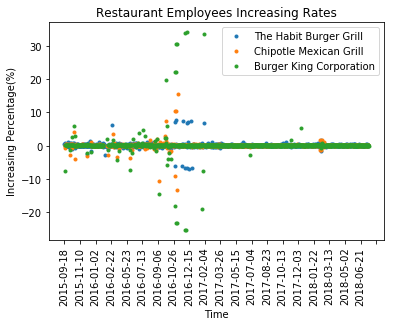

In [68]:
temp1=data[data.industry=='Restaurants']
#print(temp1)

dates=[]
for date in temp1['date_updated']:
    date = date[0:10]
    dates.append(date)

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>948):
        temp2=temp1[temp1.company_name==company]
        comp_dates=[]
        for date in temp2['date_updated']:
            date = date[0:10]
            comp_dates.append(date)
        start=min(comp_dates)
        stop=max(comp_dates[-100])
#temp2
#temp1.company_name.unique()
        followerC=temp2['employees_on_platform']
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),'.',label=company)
        plt.legend()
        plt.xlabel('Time')
        plt.title('Restaurant Employees Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()

McDonald's Corporation
Yum! Brands
Pizza Hut
KFC
Taco Bell
Long John Silver's, LLC
The Habit Burger Grill
Chipotle Mexican Grill
Burger King Corporation
Del Taco LLC
Zoes Kitchen
Del Taco Restaurants Inc.
DineEquity
Applebee's
IHOP
Del Frisco's Restaurant Group
McDonald's
Jack in the Box
Brinker International
Fiesta Restaurant Group, Inc.
Pollo Tropical
Nathan's Famous, Inc.
Potbelly Sandwich Works
Ruth's Chris Steak House
Bahama Breeze
Darden
Eddie V's Restaurants Inc.
Longhorn Steakhouse
Olive Garden
Seasons 52 Restaurant
The Capital Grille
Yard House Restaurants
Famous Dave's of America
Noodles & Company
Sonic Drive-In
The Wendy's Company
Luby's Inc.
Cracker Barrel
Texas Roadhouse
Papa John's International
Red Robin
BJ's Restaurants, Inc.
The Cheesecake Factory
Noodles &amp; Company
Chanticleer Holdings, Inc.
Diversified Restaurant Holdigns, Inc (Nasdaq: SAUC)
Kona Grill
RAVE Restaurant Group, Inc.
Diversified Restaurant Holdings, Inc (Nasdaq: SAUC)
Applebee's Neighborhood Grill + B

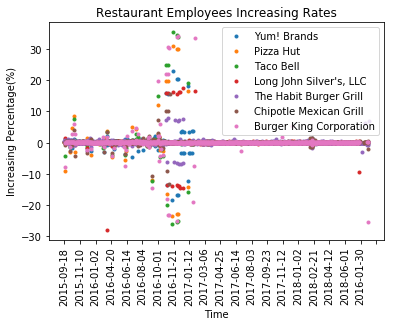

In [69]:
temp1=data[data.industry=='Restaurants']
#print(temp1)

dates = temp1['as_of_date']

plt.xticks(np.arange(len(dates), step=50),rotation='vertical')

for company in temp1.company_name.unique():
    print(company)
    if(temp1[temp1.company_name==company].count()[0]>947):
        temp2=temp1[temp1.company_name==company]
        comp_dates=temp2['as_of_date']
        start=min(comp_dates)
        stop=max(comp_dates)
#temp2
#temp1.company_name.unique()
        followerC=temp2['employees_on_platform']
        plt.plot(comp_dates[1:],np.multiply(np.divide(np.diff(followerC),followerC[:len(followerC)-1]),100),'.',label=company)
        plt.legend()
        plt.xlabel('Time')
        plt.title('Restaurant Employees Increasing Rates')
        plt.ylabel('Increasing Percentage(%)')
        #plt.xaxis.set_ticks(np.arange(start.astype(int), stop.astype(int), (stop-start)/10))
        #plt.xaxis.set_major_formatter(myFmt); 
        #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y'))
        #plt.xticks(np.arange((int(start)), (int(stop))+1, 100000.0))
        #plt.axis([0.0,688.0,0.2,1.05])
plt.show()